<a href="https://colab.research.google.com/github/RussiANC00lHACKA/ml_textbook/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Random Forest для мультиклассовой задачи***

Мы будем учиться методу случайного леса на примере реальной задачи из ML - кредитный скоринг. Что такое кредитный скоринг?

**Кредитный скоринг** — это способ оценки того, насколько надежен человек для получения кредита. Он помогает банкам понять, будет ли клиент возвращать деньги вовремя. Для этого используются различные данные, такие как доход, количество предыдущих кредитов и кредитная история клиента.

Ссылка на kaggle датасет на котором мы будем работать - [ссылка](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data?select=train.csv)

После того как вы скачали файл, вам нужно загрузить его в питоне для дальнейшей работы и обработки его данных. Для анализа данных и построения нашей модели - мы будем использовать следующие библиотеки!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## ***Первичный анализ данных***

Скачаем датасет и выведим первые элементы, посмотрим какие у нас данные и какие у нас признаки!

In [ ]:
df_train = pd.read_csv('train_log.csv')

In [ ]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Вот перевод описания классов на русский язык и разделение на категориальные и числовые признаки:

### Описание признаков:

1. **ID**  
   Представляет уникальный идентификатор записи.

2. **Customer_ID**  
   Представляет уникальный идентификатор человека.

3. **Month**  
   Представляет месяц года.

4. **Name**  
   Представляет имя человека.

5. **Age**  
   Представляет возраст человека.

6. **SSN**  
   Представляет номер социального страхования человека.

7. **Occupation**  
   Представляет профессию человека.

8. **Annual_Income**  
   Представляет годовой доход человека.

9. **Monthly_Inhand_Salary**  
   Представляет ежемесячную базовую зарплату человека.

10. **Num_Bank_Accounts**  
    Представляет количество банковских счетов, которые человек имеет.

11. **Num_Credit_Card**  
    Представляет количество кредитных карт, которые человек держит.

12. **Interest_Rate**  
    Представляет процентную ставку по кредитной карте.

13. **Num_of_Loan**  
    Представляет количество кредитов, взятых в банке.

14. **Type_of_Loan**  
    Представляет типы кредитов, взятые человеком.

15. **Delay_from_due_date**  
    Представляет среднее количество дней просрочки с даты платежа.

16. **Num_of_Delayed_Payment**  
    Представляет среднее количество просроченных платежей у человека.

17. **Changed_Credit_Limit**  
    Представляет процент изменения кредитного лимита.

18. **Num_Credit_Inquiries**  
    Представляет количество запросов на кредитные карты.

19. **Credit_Mix**  
    Представляет классификацию кредитного микса (соотношение типов кредитов).

20. **Outstanding_Debt**  
    Представляет оставшуюся задолженность, которую необходимо выплатить (в долларах США).

21. **Credit_Utilization_Ratio**  
    Представляет коэффициент использования кредитной карты.

22. **Credit_History_Age**  
    Представляет возраст кредитной истории человека.

23. **Payment_of_Min_Amount**  
    Представляет, выплачивал ли человек только минимальную сумму.

24. **Total_EMI_per_month**  
    Представляет ежемесячные выплаты по кредитам (в долларах США).

25. **Amount_invested_monthly**  
    Представляет ежемесячную сумму, инвестируемую клиентом (в долларах США).

26. **Payment_Behaviour**  
    Представляет платежное поведение клиента.

27. **Monthly_Balance**  
    Представляет ежемесячный остаток средств клиента (в долларах США).

Эти категории помогут при выборе подходящего подхода для предобработки данных (например, для кодирования категориальных признаков и нормализации числовых).

Посмотрим первичную информацию о наших данных

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Какие замечания можно сделать?

Наблюдения :
- В наборе данных отсутствуют значения.
- Набор данных Train содержит как числовые, так и строковые значения.

Также полезно смотреть на нашу целевую переменную (то есть на data['Credit_Score'])

In [ ]:
value_counts = df_train['Credit_Score'].value_counts(normalize=True) * 100
print(value_counts)

Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64


Здесь у нас представлено процентное соотношение разных классов нашей целевой переменной `y`!

Нарисуем график, чтобы это выглядело более лицеприятно!

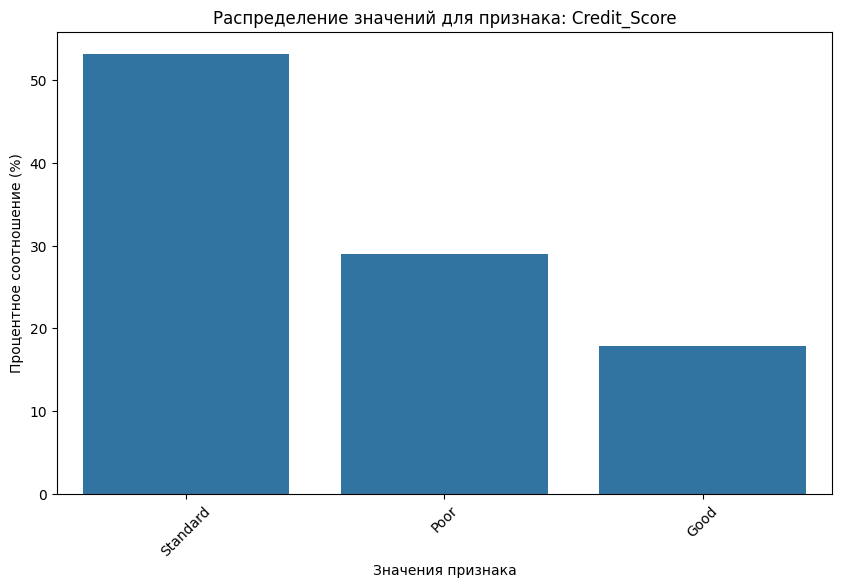

In [ ]:
# Построение графика распределения
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Распределение значений для признака: Credit_Score')
plt.ylabel('Процентное соотношение (%)')
plt.xlabel('Значения признака')
plt.xticks(rotation=45)  # Поворот меток для удобства чтения
plt.show()

### ***Пропущенные данные в категориальных признаках***

In [ ]:
df_train.isna().sum() #количество пропущенных данных по признакам

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


Выберем некоторые признаки, которые немного исправить:
1) Этот шаг заменяет все отрицательные значения в столбце "Num_Bank_Accounts" на 0. Потому что нельзя иметь отрицательное число банковских счетов;
2) Заменяет строковое значение "" на np.nan в "Type_of_Loan" что правильно, так как строковое "" не распознается как пропуск.
3) Заменим пустые строки для признаков "Occupation", "Credit_Mix",

In [ ]:
df_train.loc[df_train["Num_Bank_Accounts"] < 0, "Num_Bank_Accounts"] = 0

df_train["Type_of_Loan"].replace("", np.nan, inplace=True)

df_train["Occupation"].replace("", np.nan, inplace=True)
df_train["Credit_Mix"].replace("", np.nan, inplace=True)
df_train["Monthly_Inhand_Salary"].replace("", np.nan, inplace=True)
df_train['Changed_Credit_Limit'].replace('_', np.nan, inplace = True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Аналогично сделаем для нашей test выборки!

### ***Удаление ненужных категориальных признаков***

In [ ]:
cols_to_drop = ['ID', 'Customer_ID', 'SSN', 'Name']  # ненужная информация для нашего дальнейшего анализа
df_train = df_train.drop(columns=cols_to_drop)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      97909 non-null   object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [ ]:
df_train.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,11408


### ***Замена пропусков данных в категориальных признаках***

In [ ]:
df_train['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [ ]:
df_train['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
df_train['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

Здесь мы будем очень долго и объемно преобразовывать различные признаки нашего датасета!

In [ ]:
from sklearn.preprocessing import LabelEncoder
def preprocess_data(data):
    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10 ,'November': 11, 'December': 12
    }

    occupation_mapping = {
        'Scientist': 1, 'Teacher': 2, 'Engineer': 3, 'Entrepreneur': 4,
        'Developer': 5, 'Lawyer': 6, 'Media_Manager': 7, 'Doctor': 8,
        'Journalist': 9, 'Manager': 10, 'Accountant': 11, 'Musician': 12,
        'Mechanic': 13, 'Writer': 14, 'Architect': 15, '_______': 16
    }

    data['Month'] = data['Month'].map(month_mapping)
    data['Occupation'] = data['Occupation'].map(occupation_mapping)

    # Удаляем "_" в конце строки и преобразуем в int
    data['Age'] = data['Age'].astype(str).str.rstrip('_').astype(int)

    # Удаляем строки, где 'Age' > 100 или 'Age' < 0
    data = data.drop(data[(data['Age'] > 100) | (data['Age'] < 0)].index)

    data['Annual_Income'] = data['Annual_Income'].astype(str).str.rstrip('_').astype(float)

    data["Monthly_Inhand_Salary"] = data['Monthly_Inhand_Salary'].astype(str).str.rstrip('_').astype(float)
    data["Num_of_Loan"] = data['Num_of_Loan'].astype(str).str.rstrip('_').astype(int)
    data.loc[data["Num_of_Loan"] < 0, "Num_of_Loan"] = 0

    label_encoder = LabelEncoder()
    data['Type_of_Loan'] = label_encoder.fit_transform(data['Type_of_Loan'].astype(str))
    data['Num_of_Delayed_Payment'].fillna(data['Num_of_Delayed_Payment'].mode()[0], inplace=True) #!!!!!!!!
    data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(str).str.rstrip('_').astype(int)

    data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(str).str.rstrip('_').astype(float)
    data['Payment_of_Min_Amount'] = label_encoder.fit_transform(data['Payment_of_Min_Amount'].astype(str))
    data = data.loc[data['Amount_invested_monthly'] != '__10000__']
    data['Amount_invested_monthly'].fillna(data['Amount_invested_monthly'].mode()[0], inplace=True)
    data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype(float)
    data['Payment_Behaviour'] = label_encoder.fit_transform(data['Payment_Behaviour'].astype(str))
    data['Monthly_Balance'].fillna(data['Monthly_Balance'].mode()[0], inplace=True)
    data = data.loc[data['Monthly_Balance'] != '__-333333333333333333333333333__']
    data['Monthly_Balance'] = data['Monthly_Balance'].astype(float)
    data['Changed_Credit_Limit'].fillna(data['Changed_Credit_Limit'].mode()[0], inplace=True)
    data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)
    most_common_value = data['Credit_Mix'][data['Credit_Mix'] != '_'].mode()[0]
    data['Credit_Mix'] = data['Credit_Mix'].replace('_', most_common_value)
    data['Credit_Mix'] = label_encoder.fit_transform(data['Credit_Mix'].astype(str))
    return data
df_train = preprocess_data(df_train)
df_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,1,19114.12,1824.843333,3,4,3,4,128,...,2,809.98,26.822620,22 Years and 1 Months,1,49.574949,80.415295,3,312.494089,Good
1,2,23,1,19114.12,NaN,3,4,3,4,128,...,1,809.98,31.944960,NaN,1,49.574949,118.280222,4,284.629162,Good
3,4,23,1,19114.12,NaN,3,4,3,4,128,...,1,809.98,31.377862,22 Years and 4 Months,1,49.574949,199.458074,6,223.451310,Good
4,5,23,1,19114.12,1824.843333,3,4,3,4,128,...,1,809.98,24.797347,22 Years and 5 Months,1,49.574949,41.420153,2,341.489231,Good
5,6,23,1,19114.12,NaN,3,4,3,4,128,...,1,809.98,27.262259,22 Years and 6 Months,1,49.574949,62.430172,0,340.479212,Good


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91929 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     91929 non-null  int64  
 1   Age                       91929 non-null  int64  
 2   Occupation                91929 non-null  int64  
 3   Annual_Income             91929 non-null  float64
 4   Monthly_Inhand_Salary     78119 non-null  float64
 5   Num_Bank_Accounts         91929 non-null  int64  
 6   Num_Credit_Card           91929 non-null  int64  
 7   Interest_Rate             91929 non-null  int64  
 8   Num_of_Loan               91929 non-null  int64  
 9   Type_of_Loan              91929 non-null  int64  
 10  Delay_from_due_date       91929 non-null  int64  
 11  Num_of_Delayed_Payment    91929 non-null  int64  
 12  Changed_Credit_Limit      91929 non-null  float64
 13  Num_Credit_Inquiries      90129 non-null  float64
 14  Credit_Mix 

In [ ]:
import re
from sklearn.impute import KNNImputer

def convert_age_to_decimal(age_str):
    if pd.isna(age_str):
        return None

    years_match = re.search(r'(\d+) Years', age_str)
    months_match = re.search(r'(\d+) Months', age_str)

    years = int(years_match.group(1)) if years_match else 0
    months = int(months_match.group(1)) if months_match else 0

    decimal_age = years + (months / 12)
    return decimal_age


df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(convert_age_to_decimal)


In [ ]:
df_train['Credit_History_Age'].fillna(df_train['Credit_History_Age'].mode()[0], inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91929 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     91929 non-null  int64  
 1   Age                       91929 non-null  int64  
 2   Occupation                91929 non-null  int64  
 3   Annual_Income             91929 non-null  float64
 4   Monthly_Inhand_Salary     78119 non-null  float64
 5   Num_Bank_Accounts         91929 non-null  int64  
 6   Num_Credit_Card           91929 non-null  int64  
 7   Interest_Rate             91929 non-null  int64  
 8   Num_of_Loan               91929 non-null  int64  
 9   Type_of_Loan              91929 non-null  int64  
 10  Delay_from_due_date       91929 non-null  int64  
 11  Num_of_Delayed_Payment    91929 non-null  int64  
 12  Changed_Credit_Limit      91929 non-null  float64
 13  Num_Credit_Inquiries      90129 non-null  float64
 14  Credit_Mix 

### ***Замена данных в числовых признаках***

In [ ]:
# Найдем числовые колонки
numeric_cols_2 = df_train.select_dtypes(include=['int64', 'float64']).columns
# Заполним пропуски средним значением
df_train[numeric_cols_2] = df_train[numeric_cols_2].fillna(df_train[numeric_cols_2].mean())

Теперь у нас не осталось везде пропусков!

In [ ]:
df_train.isna().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


Заменим значения нашей целевой переменной df_train с категориальных значений на числовые, то есть: {"Poor" - 0, "Standard" - 1, "Good" - 2}

In [ ]:
df_train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
df_train['Credit_Score'] = df_train['Credit_Score'].replace({'Poor': 0, 'Standard': 1, 'Good': 2})

In [ ]:
df_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,1,19114.12,1824.843333,3,4,3,4,128,...,2,809.98,26.822620,22.083333,1,49.574949,80.415295,3,312.494089,2
1,2,23,1,19114.12,4151.375540,3,4,3,4,128,...,1,809.98,31.944960,15.916667,1,49.574949,118.280222,4,284.629162,2
3,4,23,1,19114.12,4151.375540,3,4,3,4,128,...,1,809.98,31.377862,22.333333,1,49.574949,199.458074,6,223.451310,2
4,5,23,1,19114.12,1824.843333,3,4,3,4,128,...,1,809.98,24.797347,22.416667,1,49.574949,41.420153,2,341.489231,2
5,6,23,1,19114.12,4151.375540,3,4,3,4,128,...,1,809.98,27.262259,22.500000,1,49.574949,62.430172,0,340.479212,2


### ***Матрица корреляций***

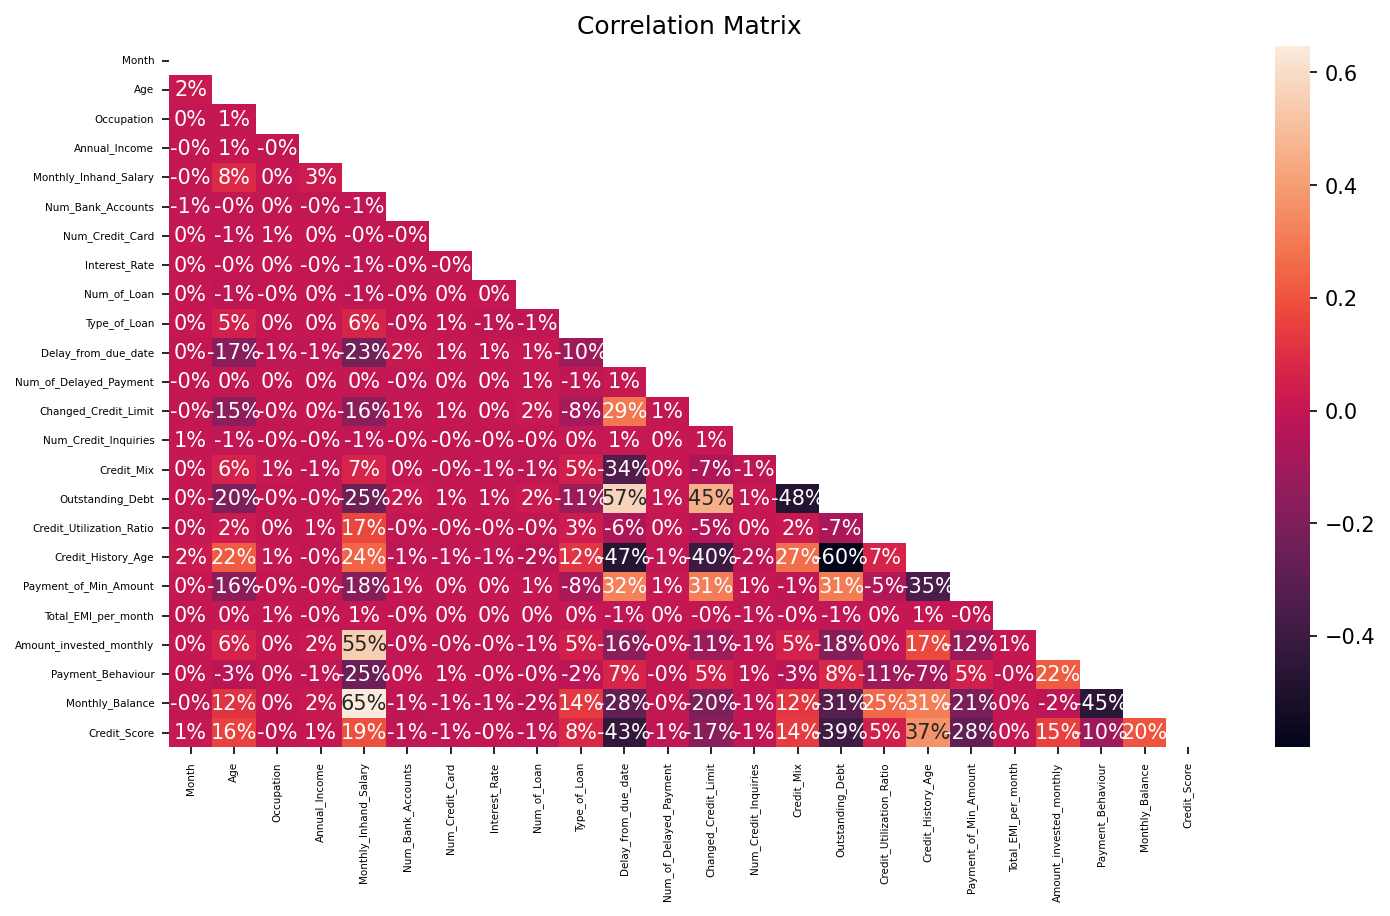

In [ ]:
corr = df_train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig = plt.figure(figsize=(10, 6), dpi=150)

sns.heatmap(corr, annot=True, mask=mask, fmt=".0%", annot_kws={"size":10})
plt.grid(False)
plt.tick_params(axis="both", labelsize=5)
plt.tight_layout()
plt.title("Correlation Matrix")
plt.show()

# ***Разбиение тестовой выборки и построение самой модели***

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.drop("Credit_Score", axis=1)
y = df_train["Credit_Score"]

# Разделим данные (80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### ***Стандартизация***

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Теперь можно обучить модель случайного леса на подготовленных данных

### ***Обучение и итоговые значения метрик***

После обучения модели, оцените её точность и другие метрики на тестовых данных:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=200,  # Количество деревьев
    max_depth=None,     # Не ограничиваем глубину
    random_state=42,
    min_samples_split = 2,
    min_samples_leaf = 1,

)
model.fit(X_train, y_train)
# Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.795279016643098

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      5279
           1       0.81      0.82      0.82      9812
           2       0.74      0.71      0.73      3295

    accuracy                           0.80     18386
   macro avg       0.78      0.78      0.78     18386
weighted avg       0.79      0.80      0.79     18386



Получите информацию о важности признаков, чтобы понять, какие из них влияют на результаты классификации:

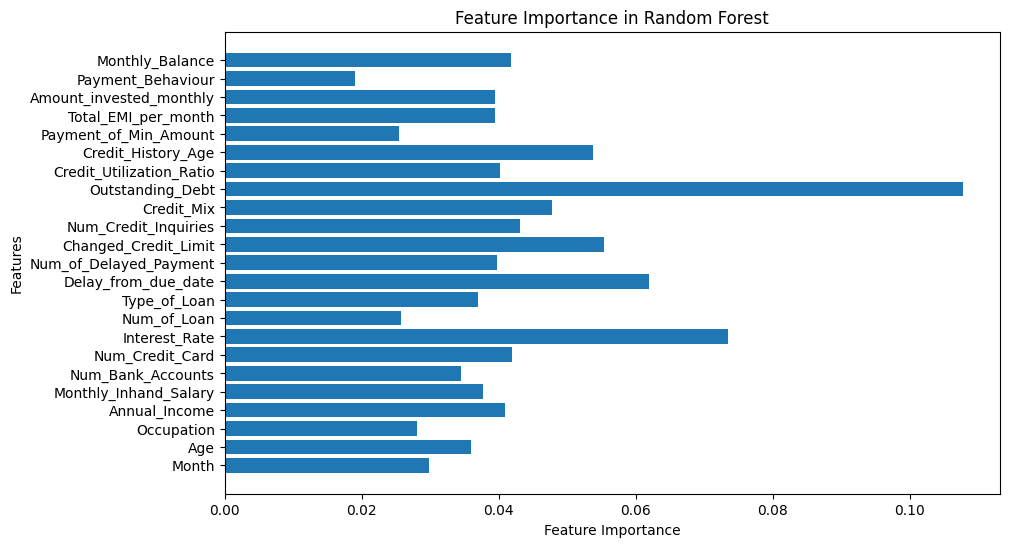

In [ ]:
import matplotlib.pyplot as plt

# Получение важности признаков
importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


### ***Улучшение модели на GridSearch:***

Для улучшения модели можно провести кросс-валидацию и подбор гиперпараметров:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Определение диапазонов гиперпараметров для случайного подбора
param_dist = {
    'n_estimators': [100, 200],  # Меньше значений
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Создание модели
model = RandomForestClassifier(random_state=42)

# Создание объекта RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=5, cv=3, scoring='accuracy', random_state=42)

# Обучение и подбор параметров
random_search.fit(X_train, y_train)

# Лучшие параметры
print(f"Best parameters: {random_search.best_params_}")


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Определение диапазонов гиперпараметров для подбора
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3]
}

# Создание модели
model = RandomForestClassifier(random_state=42)

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Обучение и подбор параметров
grid_search.fit(X_train, y_train)

# Лучшие параметры
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Ссылки:
1) [ссылка1](https://www.kaggle.com/code/saloni1712/credit-score-classification#-4.3-Categorical-Variables--)
2) [ссылка2](https://www.kaggle.com/code/clkmuhammed/credit-score-classification-part-1-data-cleaning#Check-the-head,-shape,-data-types-of-the-features.)
3) [ссылка3](https://www.kaggle.com/code/redpen12/feature-engineering-catboost#CatBoost-Model-Training-Functions)